## Importing Libraries

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

## Reading Data

In [103]:
data = pd.read_csv('winequality-red.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Exploratory Data Analysis

In [104]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

### Check if there are any null (missing) values in data

In [105]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### How correlated are the variables?

In [106]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

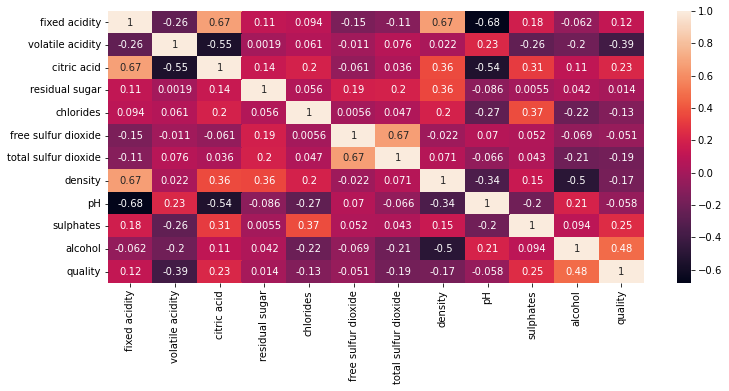

In [107]:
plt.figure(figsize=(12,5))
heatmap = sns.heatmap(data=data.corr(), annot=True)
plt.plot

In [108]:
grouped_data = data.groupby('quality').count()
grouped_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,10,10,10,10,10,10,10,10,10,10,10
4,53,53,53,53,53,53,53,53,53,53,53
5,681,681,681,681,681,681,681,681,681,681,681
6,638,638,638,638,638,638,638,638,638,638,638
7,199,199,199,199,199,199,199,199,199,199,199
8,18,18,18,18,18,18,18,18,18,18,18


### Visualizing the dependency of the wine quality on features that are highly correlated

In [109]:
grouped_alcohol_data = data.groupby('quality')['alcohol'].count()
grouped_alcohol_data = pd.DataFrame(grouped_alcohol_data)
grouped_alcohol_data

,alcohol
quality,
3,10
4,53
5,681
6,638
7,199
8,18


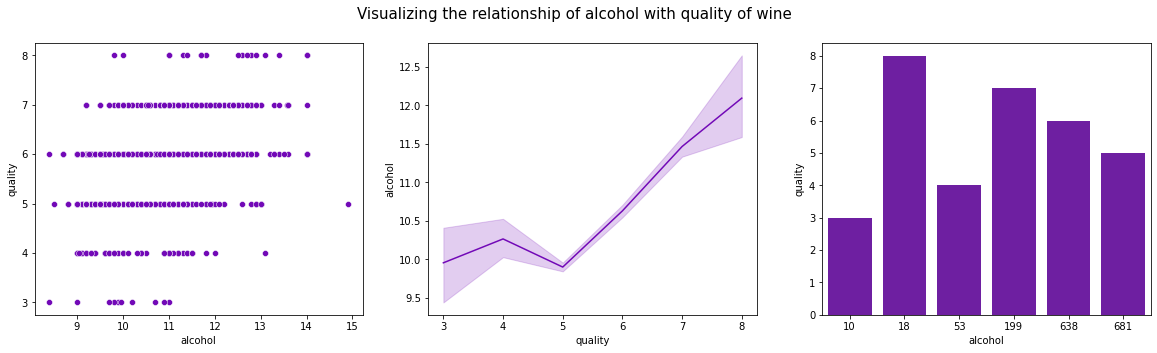

In [110]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))

sns.scatterplot(x='alcohol', y='quality', data=data, ax=axes[0], color='#7209B7')
sns.lineplot(x='quality', y='alcohol', data=data, ax=axes[1], color='#7209B7')
sns.barplot(x='alcohol', y=grouped_alcohol_data.index, data=grouped_alcohol_data, ax=axes[2],color='#7209B7')

fig.suptitle('Visualizing the relationship of alcohol with quality of wine', fontsize=15)
plt.show()

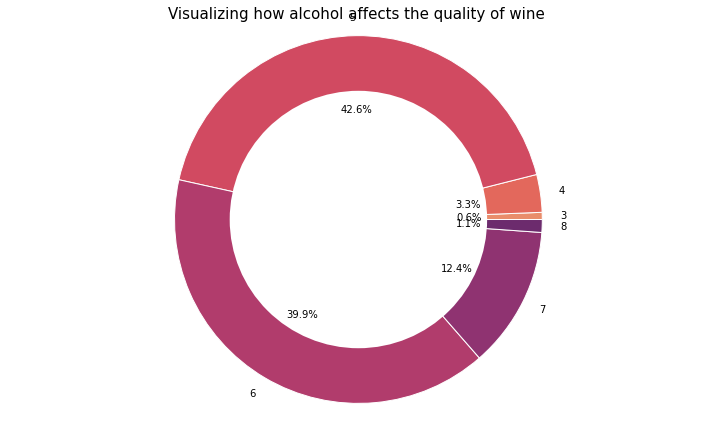

In [111]:
custom_palette = sns.color_palette("flare", len(grouped_alcohol_data))
plt.figure(figsize=(10, 6))
plt.pie(
    grouped_alcohol_data['alcohol'],
    labels=grouped_alcohol_data.index,
    autopct='%1.1f%%',
    wedgeprops={'width': 0.4, 'edgecolor': 'w'},
    colors = custom_palette
)

center_circle = plt.Circle((0, 0), 0.70, fc='white') 
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title('Visualizing how alcohol affects the quality of wine', fontsize=15)

plt.axis('equal')
plt.tight_layout()
plt.show()


In [112]:
grouped_acidity_data = data.groupby('quality')['volatile acidity'].count()
grouped_acidity_data = pd.DataFrame(grouped_acidity_data)
grouped_acidity_data

,volatile acidity
quality,
3,10
4,53
5,681
6,638
7,199
8,18


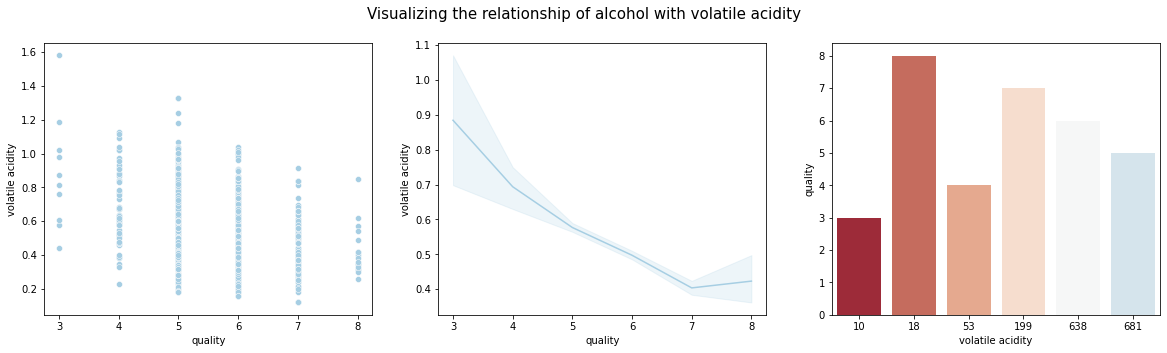

In [113]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))

sns.set_palette('RdBu', 9)
sns.scatterplot(x='quality', y='volatile acidity', data=data, ax=axes[0])
sns.lineplot(x='quality', y='volatile acidity', data=data, ax=axes[1])
sns.barplot(x='volatile acidity', y=grouped_acidity_data.index, data=grouped_acidity_data,  ax=axes[2])

fig.suptitle('Visualizing the relationship of alcohol with volatile acidity', fontsize=15)
plt.show()

### Now visualizing the relationships with features that are less correlated

In [114]:
grouped_data_pH = data.groupby('quality')['pH'].count()
grouped_data_pH = pd.DataFrame(grouped_data_pH)
grouped_data_pH

,pH
quality,
3,10
4,53
5,681
6,638
7,199
8,18


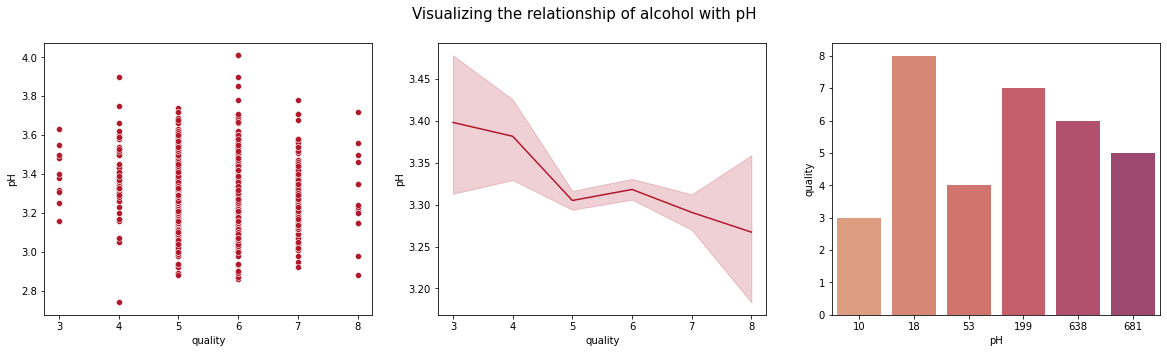

In [115]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))

diverging_colors = sns.set_palette('flare', 9)
sns.scatterplot(x='quality', y='pH', data=data, ax=axes[0])
sns.lineplot(x='quality', y='pH', data=data, ax=axes[1])
sns.barplot(x='pH', y=grouped_data_pH.index, data=grouped_data_pH,  ax=axes[2], palette = diverging_colors)

fig.suptitle('Visualizing the relationship of alcohol with pH', fontsize=15)
plt.show()

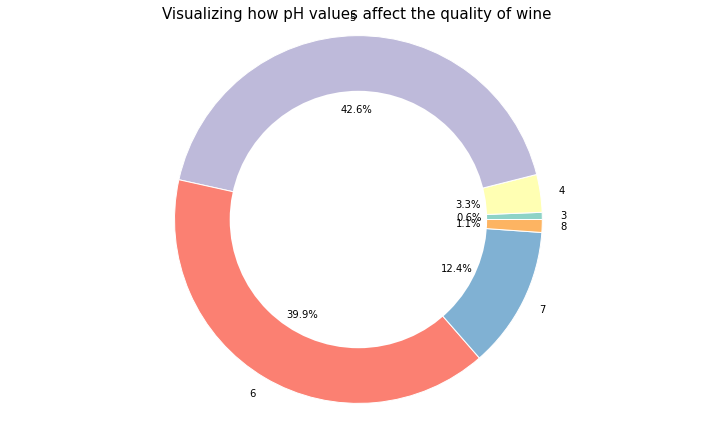

In [118]:
custom_palette = sns.color_palette("Set3", len(grouped_data_pH))
plt.figure(figsize=(10, 6))
plt.pie(
    grouped_data_pH['pH'],
    labels=grouped_data_pH.index,
    autopct='%1.1f%%',
    wedgeprops={'width': 0.4, 'edgecolor': 'w'},
    colors = custom_palette
)

center_circle = plt.Circle((0, 0), 0.70, fc='white') 
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title('Visualizing how pH values affect the quality of wine', fontsize=15)

plt.axis('equal')
plt.tight_layout()
plt.show()


Therefore, we can see that most pH values correspond to a wine quality of either 5 or 6

In [116]:
grouped_data_sulfur = data.groupby('quality')['free sulfur dioxide'].count()
grouped_data_sulfur = pd.DataFrame(grouped_data_sulfur)
grouped_data_sulfur

,free sulfur dioxide
quality,
3,10
4,53
5,681
6,638
7,199
8,18


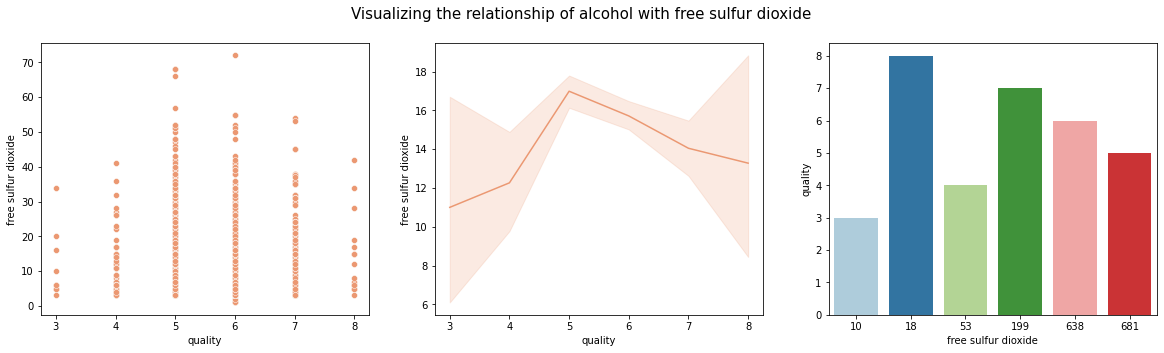

In [117]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))

diverging_colors = sns.set_palette('Paired', 10)
sns.scatterplot(x='quality', y='free sulfur dioxide', data=data, ax=axes[0])
sns.lineplot(x='quality', y='free sulfur dioxide', data=data, ax=axes[1])
sns.barplot(x='free sulfur dioxide', y=grouped_data_sulfur.index, data=grouped_data_sulfur,  ax=axes[2], palette = diverging_colors)

fig.suptitle('Visualizing the relationship of alcohol with free sulfur dioxide', fontsize=15)
plt.show()

In [119]:
data = data.drop(['residual sugar', 'free sulfur dioxide', 'pH'], axis=1)

### Scaling the data

In [163]:
y = data['quality']
x = data.drop(['quality'], axis=1)
x

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol
0,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4
1,7.8,0.880,0.00,0.098,67.0,0.99680,0.68,9.8
2,7.8,0.760,0.04,0.092,54.0,0.99700,0.65,9.8
3,11.2,0.280,0.56,0.075,60.0,0.99800,0.58,9.8
4,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4
...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,44.0,0.99490,0.58,10.5
1595,5.9,0.550,0.10,0.062,51.0,0.99512,0.76,11.2
1596,6.3,0.510,0.13,0.076,40.0,0.99574,0.75,11.0
1597,5.9,0.645,0.12,0.075,44.0,0.99547,0.71,10.2


In [164]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)
scaled_x

array([[-0.52835961,  0.96187667, -1.39147228, ...,  0.55827446,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ...,  0.02826077,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ...,  0.13426351,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ..., -0.53355375,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ..., -0.67665745,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ..., -0.66605717,
         0.01092425,  0.54162988]])

In [165]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.25, random_state=1)

In [166]:
y_train

1144    5
73      4
446     5
399     5
647     4
       ..
715     6
905     5
1096    6
235     6
1061    8
Name: quality, Length: 1199, dtype: int64

## Now performing model training 

### Random Forest Classifier

In [124]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [125]:
pred_rf = rf.predict(x_test)
print(accuracy_score(pred_rf, y_test))

0.685


Accuracy of random forest classifier is 68.5%

### Decision Tree Classifier

In [128]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [129]:
pred_dt = dt.predict(x_test)
print(accuracy_score(pred_dt, y_test))

0.64


Accuracy of decision tree classifier is 64%

### XGBoost

In [130]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded

array([2, 2, 2, ..., 3, 2, 3], dtype=int64)

In [131]:
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.25, random_state=1)

In [132]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [133]:
pred_xgb = xgb.predict(x_test)
print(accuracy_score(pred_xgb, y_test))

0.68


Accuracy of XGBoost is 68%

### Support Vector Machine

In [134]:
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [135]:
pred = svm_classifier.predict(x_test)
accuracy_score(pred, y_test)

0.6025

Accuracy of Support Vector Machine is 60.25%

### Neural Network

In [136]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y - 3) 
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.25, random_state=1)

In [137]:
model = keras.Sequential([
    layers.Input(shape=(x_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(6, activation='softmax')
])

In [138]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [139]:
history = model.fit(x_train, y_train, epochs=300, batch_size=10, validation_split=0.2)

Epoch 1/300
96/96 [==============================] - 2s 7ms/step - loss: 1.4856 - accuracy: 0.4025 - val_loss: 1.1519 - val_accuracy: 0.4958
Epoch 2/300
96/96 [==============================] - 0s 5ms/step - loss: 1.1497 - accuracy: 0.5245 - val_loss: 1.0376 - val_accuracy: 0.5583
Epoch 3/300
96/96 [==============================] - 0s 4ms/step - loss: 1.0726 - accuracy: 0.5558 - val_loss: 1.0063 - val_accuracy: 0.5917
Epoch 4/300
96/96 [==============================] - 0s 5ms/step - loss: 1.0537 - accuracy: 0.5860 - val_loss: 0.9810 - val_accuracy: 0.5875
Epoch 5/300
96/96 [==============================] - 1s 8ms/step - loss: 1.0414 - accuracy: 0.5610 - val_loss: 0.9756 - val_accuracy: 0.5792
Epoch 6/300
96/96 [==============================] - 0s 4ms/step - loss: 1.0305 - accuracy: 0.5777 - val_loss: 0.9674 - val_accuracy: 0.5750
Epoch 7/300
96/96 [==============================] - 0s 4ms/step - loss: 1.0070 - accuracy: 0.5798 - val_loss: 0.9607 - val_accuracy: 0.5917
Epoch 8/300
9

Epoch 59/300
96/96 [==============================] - 0s 4ms/step - loss: 0.8269 - accuracy: 0.6475 - val_loss: 0.9437 - val_accuracy: 0.6167
Epoch 60/300
96/96 [==============================] - 0s 4ms/step - loss: 0.8391 - accuracy: 0.6423 - val_loss: 0.9445 - val_accuracy: 0.6167
Epoch 61/300
96/96 [==============================] - 0s 4ms/step - loss: 0.8524 - accuracy: 0.6319 - val_loss: 0.9396 - val_accuracy: 0.6333
Epoch 62/300
96/96 [==============================] - 0s 3ms/step - loss: 0.8399 - accuracy: 0.6475 - val_loss: 0.9427 - val_accuracy: 0.6208
Epoch 63/300
96/96 [==============================] - 0s 3ms/step - loss: 0.8377 - accuracy: 0.6569 - val_loss: 0.9382 - val_accuracy: 0.6333
Epoch 64/300
96/96 [==============================] - 0s 3ms/step - loss: 0.8440 - accuracy: 0.6403 - val_loss: 0.9400 - val_accuracy: 0.6333
Epoch 65/300
96/96 [==============================] - 0s 3ms/step - loss: 0.8197 - accuracy: 0.6361 - val_loss: 0.9422 - val_accuracy: 0.6292
Epoch 

96/96 [==============================] - 0s 3ms/step - loss: 0.7538 - accuracy: 0.6726 - val_loss: 0.9818 - val_accuracy: 0.6042
Epoch 117/300
96/96 [==============================] - 0s 3ms/step - loss: 0.7537 - accuracy: 0.6872 - val_loss: 0.9824 - val_accuracy: 0.6208
Epoch 118/300
96/96 [==============================] - 0s 3ms/step - loss: 0.7803 - accuracy: 0.6548 - val_loss: 0.9837 - val_accuracy: 0.6125
Epoch 119/300
96/96 [==============================] - 0s 3ms/step - loss: 0.7724 - accuracy: 0.6705 - val_loss: 0.9865 - val_accuracy: 0.6167
Epoch 120/300
96/96 [==============================] - 0s 3ms/step - loss: 0.7700 - accuracy: 0.6528 - val_loss: 0.9762 - val_accuracy: 0.6083
Epoch 121/300
96/96 [==============================] - 0s 3ms/step - loss: 0.7576 - accuracy: 0.6611 - val_loss: 0.9754 - val_accuracy: 0.6292
Epoch 122/300
96/96 [==============================] - 0s 4ms/step - loss: 0.7539 - accuracy: 0.6809 - val_loss: 0.9845 - val_accuracy: 0.6000
Epoch 123/300

96/96 [==============================] - 1s 5ms/step - loss: 0.7102 - accuracy: 0.6986 - val_loss: 0.9818 - val_accuracy: 0.6333
Epoch 174/300
96/96 [==============================] - 0s 4ms/step - loss: 0.7070 - accuracy: 0.6809 - val_loss: 0.9815 - val_accuracy: 0.6292
Epoch 175/300
96/96 [==============================] - 0s 4ms/step - loss: 0.6952 - accuracy: 0.6913 - val_loss: 0.9802 - val_accuracy: 0.6250
Epoch 176/300
96/96 [==============================] - 1s 6ms/step - loss: 0.7299 - accuracy: 0.6861 - val_loss: 0.9835 - val_accuracy: 0.6292
Epoch 177/300
96/96 [==============================] - 0s 4ms/step - loss: 0.7243 - accuracy: 0.6893 - val_loss: 0.9801 - val_accuracy: 0.6417
Epoch 178/300
96/96 [==============================] - 0s 4ms/step - loss: 0.7179 - accuracy: 0.6913 - val_loss: 0.9655 - val_accuracy: 0.6333
Epoch 179/300
96/96 [==============================] - 0s 4ms/step - loss: 0.7218 - accuracy: 0.6767 - val_loss: 0.9602 - val_accuracy: 0.6375
Epoch 180/300

96/96 [==============================] - 0s 4ms/step - loss: 0.6946 - accuracy: 0.6986 - val_loss: 0.9842 - val_accuracy: 0.6208
Epoch 231/300
96/96 [==============================] - 0s 3ms/step - loss: 0.6776 - accuracy: 0.7070 - val_loss: 0.9872 - val_accuracy: 0.6125
Epoch 232/300
96/96 [==============================] - 0s 4ms/step - loss: 0.6831 - accuracy: 0.7101 - val_loss: 0.9886 - val_accuracy: 0.6042
Epoch 233/300
96/96 [==============================] - 0s 4ms/step - loss: 0.7032 - accuracy: 0.7049 - val_loss: 0.9892 - val_accuracy: 0.6250
Epoch 234/300
96/96 [==============================] - 0s 4ms/step - loss: 0.6772 - accuracy: 0.7028 - val_loss: 0.9922 - val_accuracy: 0.6417
Epoch 235/300
96/96 [==============================] - 0s 3ms/step - loss: 0.6850 - accuracy: 0.7143 - val_loss: 0.9872 - val_accuracy: 0.6500
Epoch 236/300
96/96 [==============================] - 0s 4ms/step - loss: 0.7070 - accuracy: 0.6861 - val_loss: 0.9827 - val_accuracy: 0.6542
Epoch 237/300

96/96 [==============================] - 0s 4ms/step - loss: 0.6397 - accuracy: 0.7351 - val_loss: 1.0060 - val_accuracy: 0.6500
Epoch 288/300
96/96 [==============================] - 0s 4ms/step - loss: 0.6533 - accuracy: 0.7237 - val_loss: 1.0090 - val_accuracy: 0.6417
Epoch 289/300
96/96 [==============================] - 0s 4ms/step - loss: 0.6469 - accuracy: 0.7185 - val_loss: 0.9961 - val_accuracy: 0.6292
Epoch 290/300
96/96 [==============================] - 0s 4ms/step - loss: 0.6649 - accuracy: 0.7070 - val_loss: 0.9925 - val_accuracy: 0.6292
Epoch 291/300
96/96 [==============================] - 0s 4ms/step - loss: 0.6305 - accuracy: 0.7341 - val_loss: 1.0092 - val_accuracy: 0.6250
Epoch 292/300
96/96 [==============================] - 0s 4ms/step - loss: 0.6288 - accuracy: 0.7258 - val_loss: 1.0109 - val_accuracy: 0.6375
Epoch 293/300
96/96 [==============================] - 0s 4ms/step - loss: 0.6691 - accuracy: 0.7143 - val_loss: 1.0132 - val_accuracy: 0.6417
Epoch 294/300

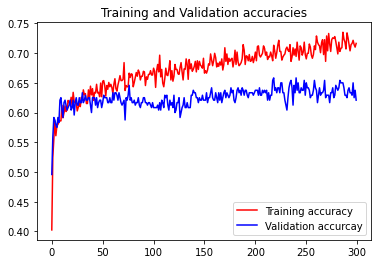

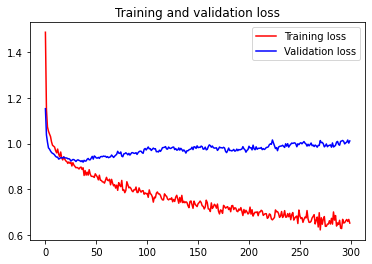

In [140]:
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc,'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accurcay')
plt.title('Training and Validation accuracies')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Accuracy obtained from Neural Network is 71.64% with validation accuracy of 62.08%

### Creating an ensemble model

In [159]:
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
svm_classifier = SVC(probability=True, random_state=42)

In [160]:
ensemble_classifier = VotingClassifier(estimators=[
    ('decision_tree', dt),
    ('random_forest', rf),
    ('svm', svm_classifier)
], voting='soft')

In [167]:
ensemble_classifier.fit(x_train, y_train)

VotingClassifier(estimators=[('decision_tree',
                              DecisionTreeClassifier(random_state=42)),
                             ('random_forest',
                              RandomForestClassifier(random_state=42)),
                             ('svm', SVC(probability=True, random_state=42))],
                 voting='soft')

In [168]:
y_pred = ensemble_classifier.predict(x_test)
accuracy_score(y_pred, y_test)

0.665

Accuracy obtained from ensemble model is 66.5%

### Bagging Classifier

In [171]:
base_classifier = RandomForestClassifier(random_state=10)

In [172]:
bag = BaggingClassifier(base_classifier, n_estimators=10, random_state=12)
bag.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=10),
                  random_state=12)

In [173]:
y_pred = bag.predict(x_test)
accuracy_score(y_pred, y_test)

0.7025

Accuracy obtained from Bagging Classifier is 70.25%